In [56]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

from langchain_openai import ChatOpenAI
from langchain_core.messages.utils import trim_messages,count_tokens_approximately

In [57]:
load_dotenv()
model = ChatOpenAI(model='gpt-4o-mini')

In [58]:
MAX_TOKENS = 150

In [59]:
# Node
def call_model(state: MessagesState):
    messages = trim_messages(
        state["messages"],
        strategy="last",
        token_counter = count_tokens_approximately,
        max_tokens = MAX_TOKENS
    )
    print('Current Token count: ', count_tokens_approximately(messages))
    for msg in messages:
        print(msg.content)
    
    response = model.invoke(messages)
    return {"messages": [response]}


In [60]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [61]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

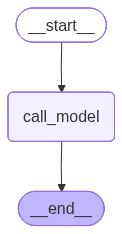

In [62]:
graph

In [63]:
config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Hi, my name is Dileep."}]},
    config,
)

result["messages"][-1].content

Current Token count:  10
Hi, my name is Dileep.


'Hi Dileep! How can I assist you today?'

In [64]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

Current Token count:  35
Hi, my name is Dileep.
Hi Dileep! How can I assist you today?
I am learning LangGraph.


"That's great to hear, Dileep! LangGraph is an interesting tool for working with language models and graph structures. What specific aspects of LangGraph are you focusing on, or do you have any questions about it?"

In [65]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "Can you explain short term memory"}]},
    config,
)

result["messages"][-1].content

Current Token count:  107
Hi, my name is Dileep.
Hi Dileep! How can I assist you today?
I am learning LangGraph.
That's great to hear, Dileep! LangGraph is an interesting tool for working with language models and graph structures. What specific aspects of LangGraph are you focusing on, or do you have any questions about it?
Can you explain short term memory


'Sure! Short-term memory (STM) is a cognitive system that temporarily holds a small amount of information for a brief period of time. Here are some key points about short-term memory:\n\n1. **Capacity**: Short-term memory has a limited capacity. One well-known theory, proposed by psychologist George A. Miller in 1956, suggests that the average number of items an individual can hold in short-term memory is about 7 ± 2 (typically between 5 and 9 items).\n\n2. **Duration**: Information in short-term memory typically lasts for about 15 to 30 seconds without rehearsal. If the information is not actively maintained (for example, by repeating it or using mnemonic devices), it is likely to fade away.\n\n3. **Encoding**: Short-term memory primarily encodes information acoustically (by sound) but can also include visual information. This means that when you recall information from short-term memory, you often think of it in terms of how it sounds.\n\n4. **Function**: Short-term memory plays a cr

In [66]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is Langchain?"}]},
    config,
)

result["messages"][-1].content

Current Token count:  9
What is Langchain?


'Langchain is a framework designed to facilitate the development of applications powered by language models. It provides tools and components that make it easier for developers to integrate and utilize large language models (LLMs) like GPT-3 or other AI models in their software. Langchain is particularly focused on enabling the creation of applications that can perform tasks such as conversational agents, information retrieval, text summarization, and more.\n\nKey features of Langchain typically include:\n\n1. **Modularity**: It has a modular architecture that allows developers to mix and match different components to build tailored applications.\n\n2. **Data Augmentation**: Langchain can integrate external data sources, allowing language models to retrieve and incorporate information from various databases or APIs.\n\n3. **Prompt Management**: It offers tools for managing and optimizing prompts used to query language models, which is crucial for getting the best responses from LLMs.\n

In [67]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token count:  8
What is my name?


"I'm sorry, but I don't have that information. Could you please tell me your name?"

In [68]:
for item in graph.get_state({"configurable": {"thread_id": "chat-1"}}).values['messages']:
    print(item.content)
    print('-'*120)

Hi, my name is Dileep.
------------------------------------------------------------------------------------------------------------------------
Hi Dileep! How can I assist you today?
------------------------------------------------------------------------------------------------------------------------
I am learning LangGraph.
------------------------------------------------------------------------------------------------------------------------
That's great to hear, Dileep! LangGraph is an interesting tool for working with language models and graph structures. What specific aspects of LangGraph are you focusing on, or do you have any questions about it?
------------------------------------------------------------------------------------------------------------------------
Can you explain short term memory
------------------------------------------------------------------------------------------------------------------------
Sure! Short-term memory (STM) is a cognitive system that temp